<a href="https://colab.research.google.com/github/mrzResearchArena/Karpathy/blob/main/Karpathy_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. test:

In [ ]:
# MicroGrad: https://github.com/karpathy/micrograd
# https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/micrograd

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='') -> None:
        self.data = data
        self._op = _op
    #end-def

    def __add__(self, other):
        # other = other if isinstance(other, Value) else Value(other)
        # out = Value(self.data + other.data, (self, other), '+')

        out = Value(self.data + other.data, (self, other), '+')


        return out
    #end-def
#end-class

a = Value(4.5)
b = Value(-3)
print(a+b)

# def __add__(self, other):
#         other = other if isinstance(other, Value) else Value(other)
#         out = Value(self.data + other.data, (self, other), '+')


In [ ]:
class Value:
    def __init__(self, data, grad=0) -> None:
        self.data = data
        self.grad = grad
    #end-def

    def __add__(self, other):
        return self.data + other.data
    #end-def

    def __repr__(self,) -> str:
        return f'Value(data={self.data}, grad={self.grad})'
    #end-def
#end-class

a = Value(4.5)
b = Value(-3)
print(a+b)
print(a)

# def __add__(self, other):
#         other = other if isinstance(other, Value) else Value(other)
#         out = Value(self.data + other.data, (self, other), '+')


1.5
Value(data=4.5, grad=0)


In [ ]:
# isinstance('2.3', (int, float))
!pip install micrograd

In [ ]:
from micrograd.engine import Value

a = Value(-4.0)
b = Value(2.0)
c = a + b

# print(c)

d = a * b + b**3

# print(d)

c += c + 1

c += 1 + c + (-a)

print(c)

d += d * 2 + (b + a).relu()
d += 3 * d + (b - a).relu()
e = c - d
f = e**2
g = f / 2.0
g += 10.0 / f
print(f'{g.data:.4f}') # prints 24.7041, the outcome of this forward pass

print(g)

# g.backward()
# print(f'{a.grad:.4f}') # prints 138.8338, i.e. the numerical value of dg/da
# print(f'{b.grad:.4f}') # prints 645.5773, i.e. the numerical value of dg/db

Value(data=-1.0, grad=0)
24.7041
Value(data=24.70408163265306, grad=0)


In [ ]:
import numpy as np
np.random.seed(1337)
np.random.random()

0.2620246750155817

In [ ]:
# from graphviz import Digraph
import graphviz
w = graphviz.Digraph('wide_')
w.edges(('0', str(i)) for i in range(1, 10))
# doctest_mark_exe()
w.view()


'wide_.gv.pdf'

# 1. begin:

In [ ]:
import torch
print(f'PyTorch Version: {torch.__version__}.')

import numpy as np
from matplotlib import pyplot as plt

from graphviz import Digraph

PyTorch Version: 2.1.0+cu121.


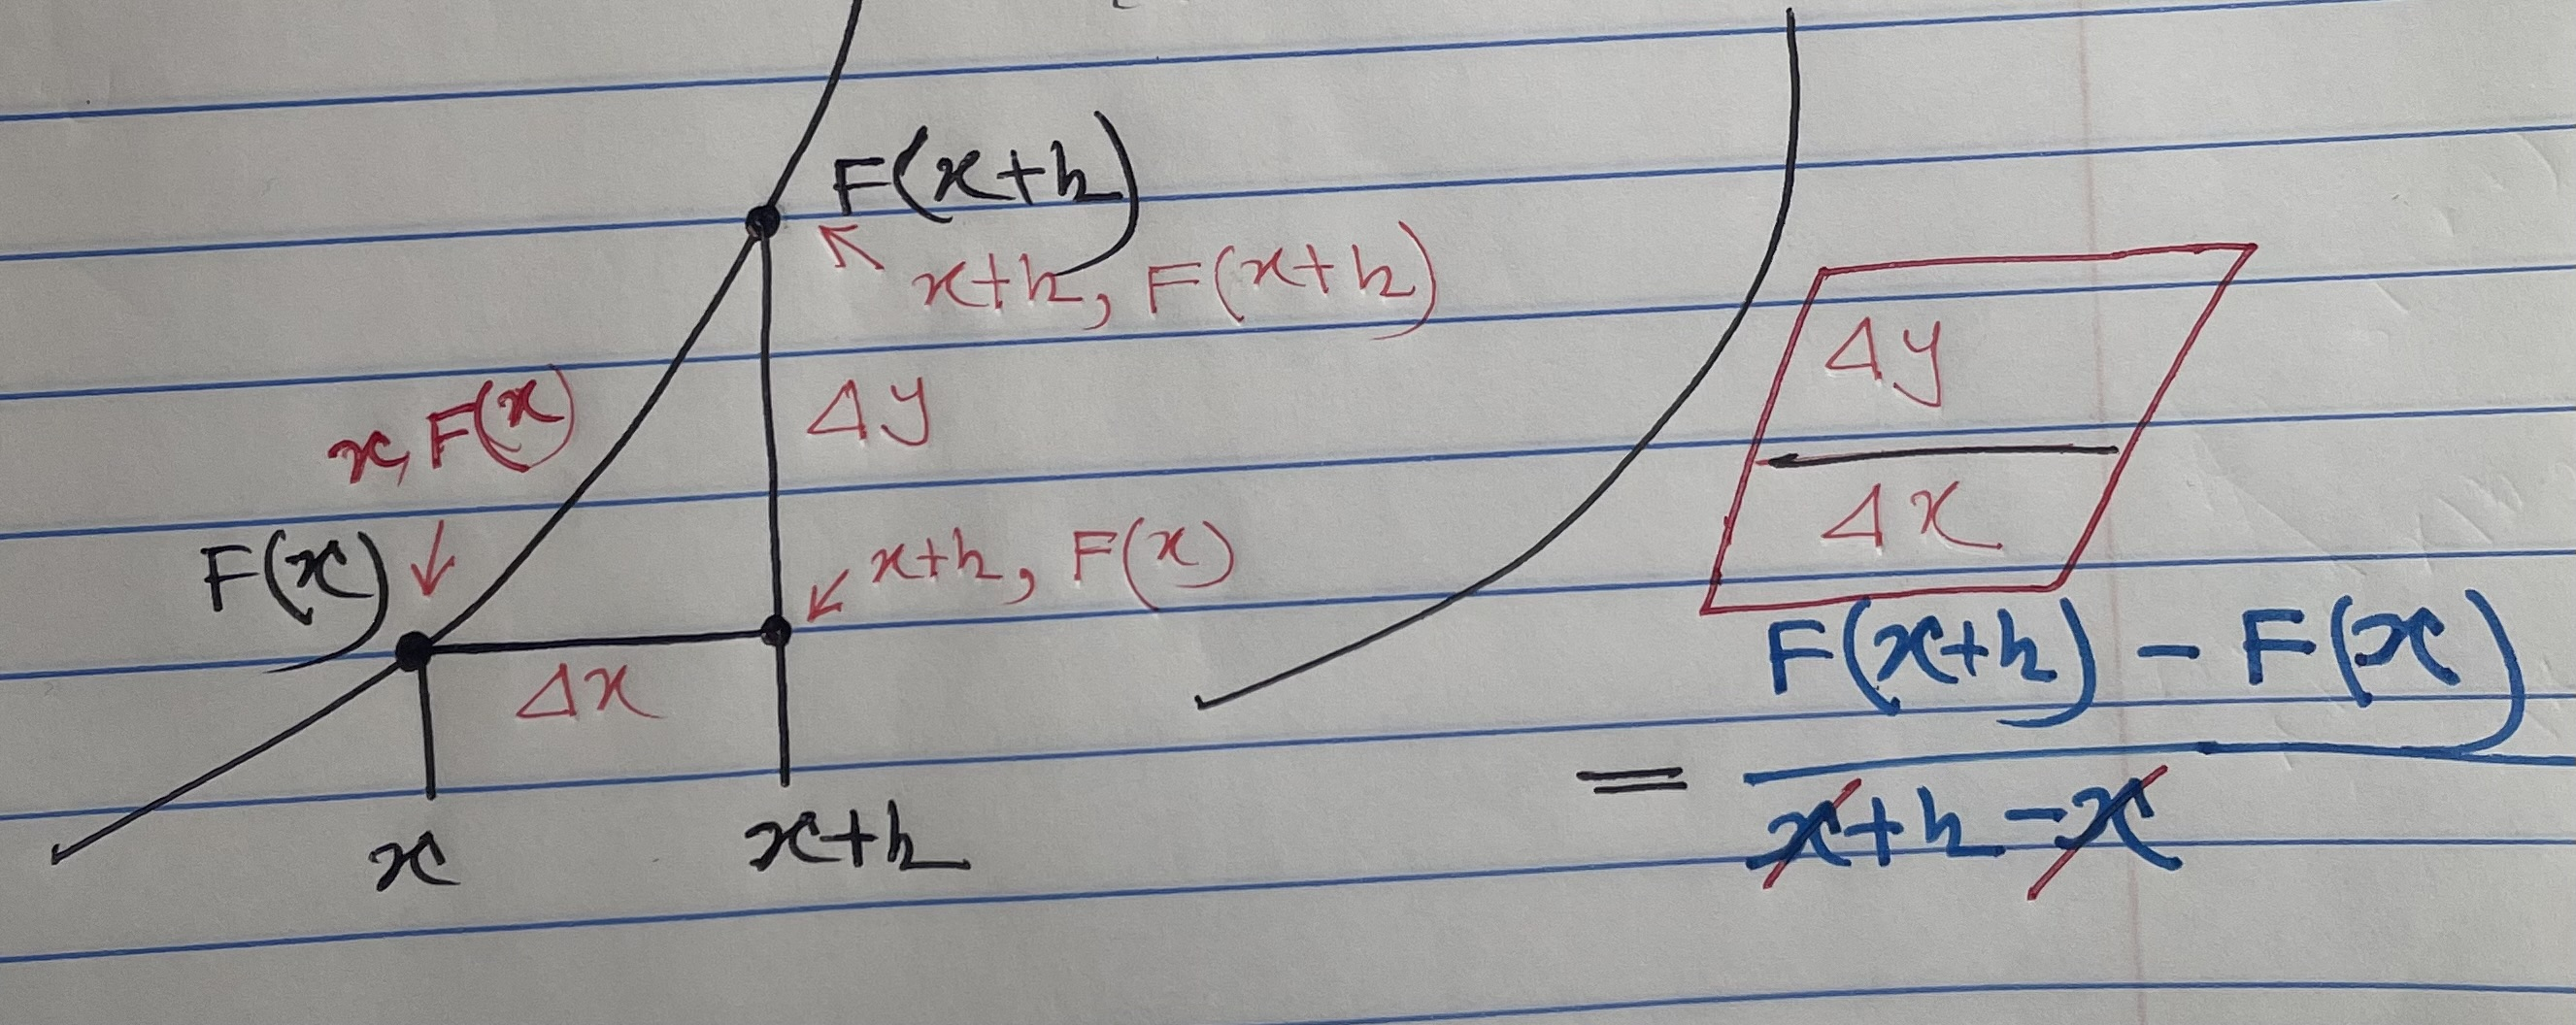

In [ ]:
# Original Function:
def F(x):
    # return x**2.0
    return (3*(x**2)) - (4*x) + 5
#end-def


# Derivate of Original Function — analytical:
def dF(x):
    # return 2.0*x
    return (6.0*x) - 4
#end-def


# Derivate of Original Function — Numerical Forward Derivative:
def dForward(x, h):
    return (F(x+h) - F(x))/h
#end-def


# Derivate of Original Function — Numerical Backward Derivative:
def dBackward(x, h):
    return (-F(x-h) + F(x))/h
#end-def


# Derivate of Original Function — Numerical Central Derivative:
def dCentral(x, h):
    return (F(x+h) - F(x-h))/(2.0*h)
#end-def

In [ ]:
value = 5
h = 1e-1

#1e-1 → 0.1
#1e-2 → 0.01
#1e-3 → 0.001
#1e-4 → 0.0001
#1e-5 → 0.00001

print(dF(value))
print(dForward(value, h))
print(dBackward(value, h))
print(dCentral(value, h))

26.0
26.300000000000026
25.69999999999986
25.999999999999943


tensor([-3.0000, -2.7500, -2.5000, -2.2500, -2.0000, -1.7500, -1.5000, -1.2500,
        -1.0000, -0.7500, -0.5000, -0.2500,  0.0000,  0.2500,  0.5000,  0.7500,
         1.0000,  1.2500,  1.5000,  1.7500,  2.0000,  2.2500,  2.5000,  2.7500,
         3.0000])
tensor([44.0000, 38.6875, 33.7500, 29.1875, 25.0000, 21.1875, 17.7500, 14.6875,
        12.0000,  9.6875,  7.7500,  6.1875,  5.0000,  4.1875,  3.7500,  3.6875,
         4.0000,  4.6875,  5.7500,  7.1875,  9.0000, 11.1875, 13.7500, 16.6875,
        20.0000])


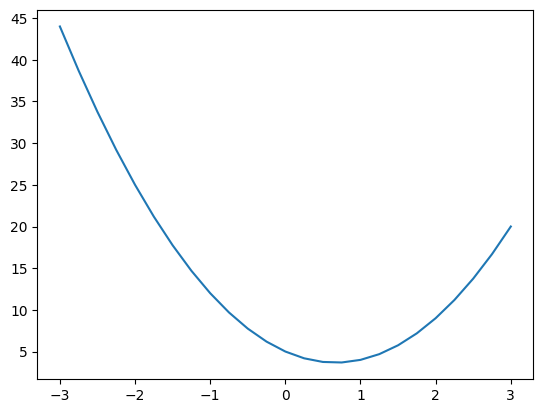

In [ ]:
h = 0.25

xp = torch.arange(start=-3, end=3+h, step=h)
print(xp)


yp = F(xp)
print(yp)


plt.plot(xp, F(xp))
plt.show()

In [ ]:
value = 3.0
h = 1e-1 # 1e-3
dCentral(value, h)

14.000000000000021

In [ ]:
h = 1e-4

a = 2
b = -3
c = 10

d1 = (a*b) + c
a += h
d2 = (a*b) + c

slope = (d2-d1)/h

print(f'd1: {d1}')
print(f'd2: {d2}')
print(f'slope: {slope}')

d1: 4
d2: 3.999699999999999
slope: -3.000000000010772


# 2. Create a Computational Graph using OOP:

In [ ]:
class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data = data
        self.grad = 0.0 # no effect
        self.label = label

        self._backward = lambda: None # "_backward" stores/caches a function.
        self._prev = set(_children)
        self._op = _op
    #end-def

    def __repr__(self) -> str:
        return f'Value(data={self.data}, grad={self.grad}, label={self.label})'
    #end-def

    def __add__(self, other: object):

        other = other if isinstance(other, Value) else Value(other)

        output = Value(self.data + other.data, (self, other), '+')

        def backward():
            self.grad  += 1.0 * output.grad
            other.grad += 1.0 * output.grad
            # print('inside: __add__')
        #end-def
        output._backward = backward
        '''
        Let's consider,
        (a) "backward()" is function and "_backward" is a variable [class: Value, object: output].
        (b) If we would like to cache the function, we could write "output._backward = backward" as expression.
        (c) However, we could not write "output._backward = backward()" as expression
            because it will automatically call everytime.
        (d) It is a technique to store/cache a function so that we could use when it is required.
        '''

        return output
    #end-def

    def __radd__(self, other: object):
        return self + other
    #end-def

    def __mul__(self, other: object):

        other = other if isinstance(other, Value) else Value(other)

        output = Value(self.data * other.data, (self, other), '*')

        def backward():
            self.grad  += other.data * output.grad
            other.grad += self.data * output.grad
            # print('inside: __mul__')
        #end-def
        output._backward = backward

        return output
    #end-def

    def __rmul__(self, other: object): # other * self
        return self * other
    #end-def

    def __sub__(self, other): # self - other
        return self + (-other)
    #end-def

    def __rsub__(self, other): # other - self
        return other + (-self)
    #end-def

    def __neg__(self):
        return self * -1.0
    #end-def

    def __truediv__(self, other): #self/other
        return self * (other ** -1)
    #end-def

    def __rtruediv__(self, other): # other/self
        return other * (self ** -1)
    #end-def

    def __pow__(self, other: object):
        '''
        # function call: a.pow(3)
        self  ← a # "self"  represents "a" object of class:Value.
        other ← 3 # "other" represents "3"
        '''

        # __o = __o if isinstance(__o, Value) else Value(__o)

        assert isinstance(other, (int, float)), f'The tool accepts "integer" and "float" as exponent value.'

        output = Value(self.data ** other, (self,), f'pow ({self.data}^{other})')

        def backward():
            self.grad += (other * (self.data ** (other - 1.0))) * output.grad
        #end-def
        output._backward = backward

        return output
    #end-def

    # Non-linear Function:
    def exp(self):
        o = np.exp(self.data)

        output = Value(np.exp(self.data), (self,), 'exp')

        def backward():
            self.grad += o * output.grad # output.data * output.grad --> local derivative x chain rule.
        #end-def
        output._backward = backward

        return output
    #end-def

    # def exp(self):
    #     x = self.data
    #     out = Value(np.exp(x), (self, ), 'exp')

    #     def _backward():
    #         self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    #     #end-def
    #     out._backward = _backward

    #     return out
    # #end-def

    def tanh(self):
        x = self.data

        o = (np.exp(2.0 * x) - 1.0) / (np.exp(2.0 * x) + 1.0)
        # o = np.tanh(x)

        output = Value(o, (self,), 'tanh')

        def backward():
            self.grad += (1.0-(o**2.0)) * output.grad
        #end-def
        output._backward = backward

        return output
    #end-def

    def relu(self,):
        x = self.data

        output = Value(x if x>0.0 else 0.0, (self,), 'ReLU')

        def backward():
            self.grad += (1.0 if x>0.0 else 0.0) * output.grad
        #end-def
        output._backward = backward

        return output
    #end-def

    #Differential Calculus:
    def backward(self):
        '''
        self = o
        "self" indecates "o"
        '''

        topo = []
        visited = set()

        def build_topology(v):
            # print('works!')
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topology(child)
                #end-for
                topo.append(v)
            #end-if/else
        #end-def
        build_topology(self)
        # print(topo)

        self.grad = 1.0     # ∂(o)/∂o = 1
        for node in reversed(topo):
            # print(node._backward())
            node._backward()
        #end-for
    #end-def
#end-class

In [ ]:
'''
Program: Topological Sort
Author:  Andrej Karpathy
Date:    God knows.
'''

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
            #end-for
        #end-if/else
    #end-def
    build(root)
    return nodes, edges
#end-def


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{%s | data = %.4f | grad = %.2f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
        #end-else/if
    #end-for

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    #end-for

    return dot
#end-def

# Example-1:

In [ ]:
a = Value(2, label='a')
b = Value(-3, label='b')
c = Value(10, label='c')

# a+b # a.__add__(b) --> Value(data=-1)
# a*b # a.__mul__(b) --> Value(data=-6)

e = a*b
e.label = 'e'

d = e + c # a.__mul__(b).__add__(c)
d.label = 'd'

f = Value(-2, label='f')
L = d*f; L.label = 'L'

print(d)
print(d._prev)
print(d._op)
print(d.label)

print(L)
print(L._prev)

Value(data=4, grad=0.0, label=d)
{Value(data=10, grad=0.0, label=c), Value(data=-6, grad=0.0, label=e)}
+
d
Value(data=-8, grad=0.0, label=L)
{Value(data=4, grad=0.0, label=d), Value(data=-2, grad=0.0, label=f)}


# Example-2:

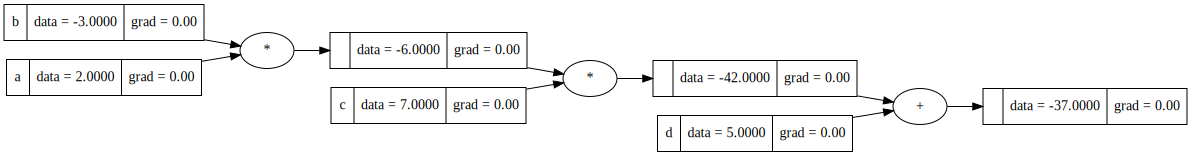

In [ ]:
a = Value(2, label='a')
b = Value(-3, label='b')

c = Value(7, label='c')

d = Value(5, label='d')

o = (a*b*c) + d # a.__mul__(b) --> Value(data=-6)

draw_dot(o)

# Example-3: Forward Gradient Calculation:

In [ ]:
def dForwardKarpathy():
    h = 0.001 #1e-3

    # F(x): begin #
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b') # b.data -= h

    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'

    L1 = L.data
    # F(x): end #


    # F(x+h): begin #
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')

    # b.data += h

    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'

    d = e + c; d.label = 'd'

    f = Value(-2.0, label='f')

    L = d * f; L.label = 'L'

    L.data += h

    L2 = L.data
    # F(x+h): end #

    print((L2 - L1)/h)
#end-def

dForwardKarpathy()

1.000000000000334


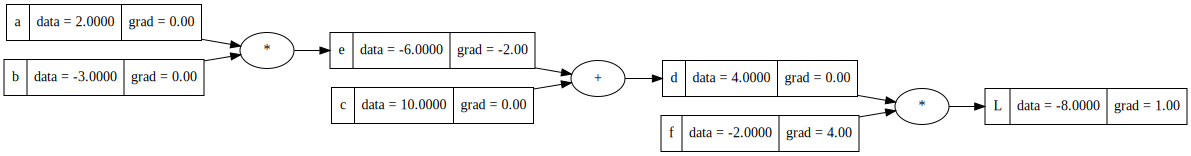

In [ ]:
L.grad = 1.0
d.grad = -2.0 #(=f)
f.grad = 4.0 #(=d)
e.grad = -2.0
c.grad = -2.0
a.grad = 6.0
b.grad = -4.0

draw_dot(L)

In [ ]:
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L)

Value(data=-1.406496, grad=0.0, label=)


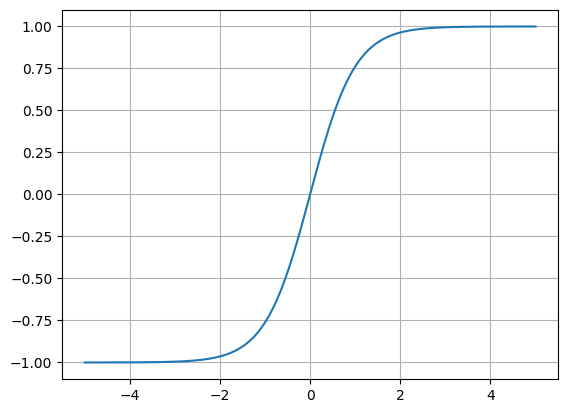

In [ ]:
h  = 0.02

xp = np.arange(start=-5, stop=5+h, step=h)

yp = np.tanh(xp)

plt.plot(xp, yp)

plt.grid(True)

plt.show()

# Example-4: 1-Neuron Cell Calculation — Hands-on

Value(data=0.8799999999999999, grad=0.0, label=n)
Value(data=0.7064193203972352, grad=0.0, label=o)


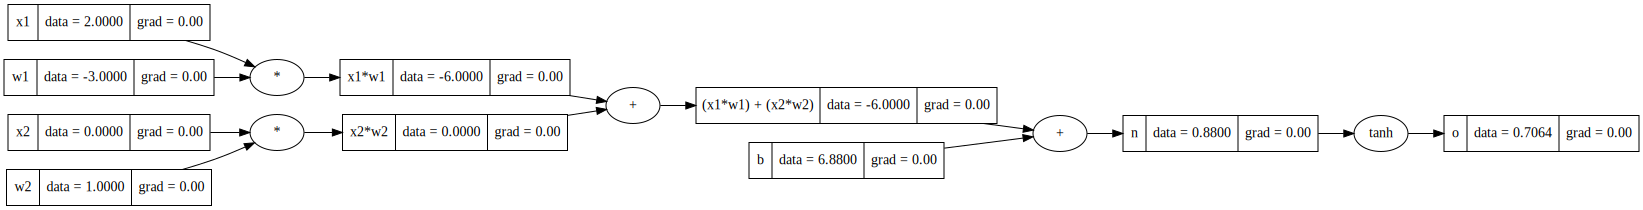

In [ ]:
x1 = Value(2.0,  label='x1')
w1 = Value(-3.0, label='w1')


x2 = Value(0.0, label='x2')
w2 = Value(1.0, label='w2')


b  = Value(6.88, label='b') # When b = 6.88, 1-o^2 = 0.50


x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'


x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = '(x1*w1) + (x2*w2)'


n = x1w1x2w2 + b; n.label = 'n'
print(n)


o = n.tanh(); o.label = 'o'
print(o)


# show grads:
draw_dot(o)

#### Hands-on Gradients/Derivatives:

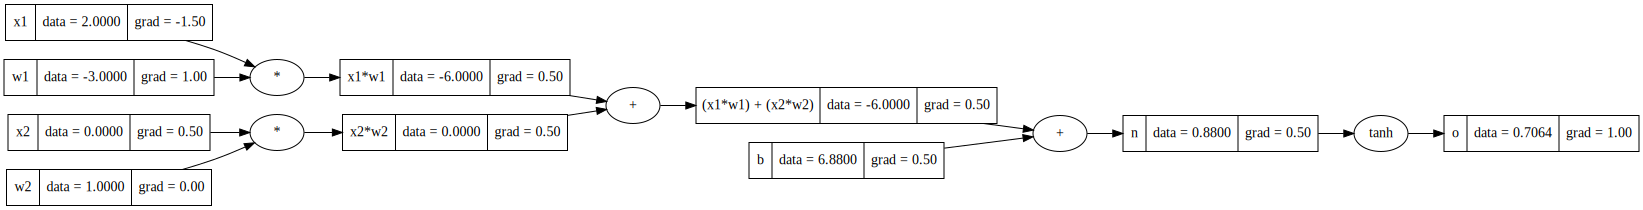

In [ ]:
# ∂(o)/∂o = 1
o.grad = 1


# ∂(o)/∂n = 0.5 = 1-o^2.
n.grad = 0.5


# ∂(o)/∂x1w1x2w2 = 0.5 (it carries previous data.)
x1w1x2w2.grad = 0.5


# ∂(o)/b = 0.5 (it carries previous data.)
b.grad = 0.5


# ∂(o)/∂x1w1 = 0.5 (it carries previous data.)
x1w1.grad = 0.5


# ∂(o)/∂x2w2 = 0.5 (it carries previous data.)
x2w2.grad = 0.5


#  ∂(w1)/∂x1w1 = 0.5 * 2 (it carries previous data and x1.data)
w1.grad = 0.5 * 2.0


#  ∂(x1)/∂x1w1 = 0.5 * -3 (it carries previous data and w1.data)
x1.grad = 0.5 * (-3)


#  ∂(w2)/∂x2w2 = 0.5 * 0 (it carries previous data and x2.data)
w2.grad = 0.5 * 0.0


#  ∂(x2)/∂x2w2 = 0.5 * 2 (it carries previous data and w2.data)
x2.grad = 0.5 * 1.0

# show grads:
draw_dot(o)

# Example-5: 1-Neuron Cell Calculation — Semi-automated Gradients

#### Semi-automated Gradients/Derivatives:

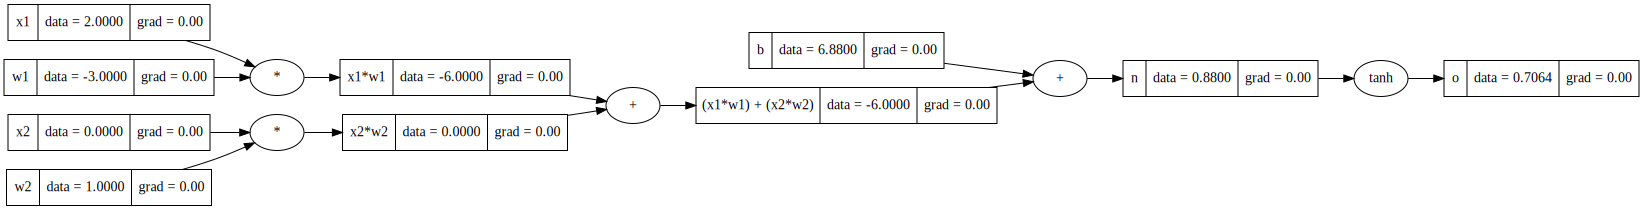

In [ ]:
x1 = Value(2.0,  label='x1')
w1 = Value(-3.0, label='w1')


x2 = Value(0.0, label='x2')
w2 = Value(1.0, label='w2')


b  = Value(6.88, label='b') # When b = 6.88, 1-o^2 = 0.50


x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'


x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = '(x1*w1) + (x2*w2)'


n = x1w1x2w2 + b; n.label = 'n'
# print(n)


o = n.tanh(); o.label = 'o'
# print(o)


# show grads:
draw_dot(o)

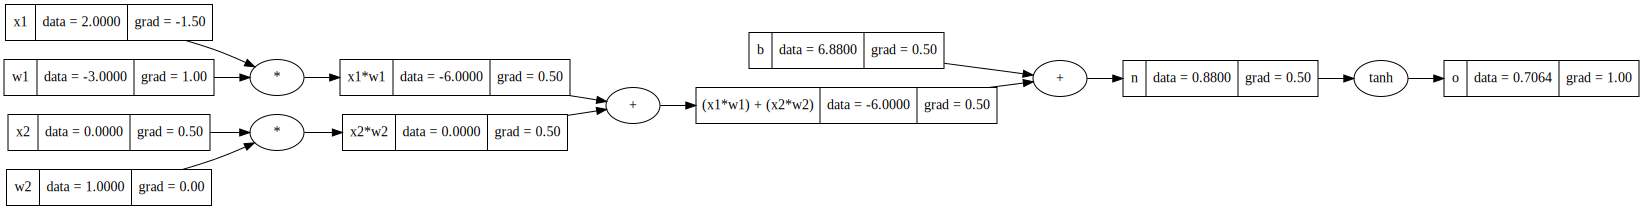

In [ ]:
o.grad = 1

o._backward()
n._backward()

# b._backward() // It has no effects.

x1w1x2w2._backward()

x1w1._backward()
x2w2._backward()


# show grads:
draw_dot(o)

In [ ]:
o._backward()

# Example-6: 1-Neuron Cell Calculation — Automated Gradients (Topological Sort — Outside of Class: Value)

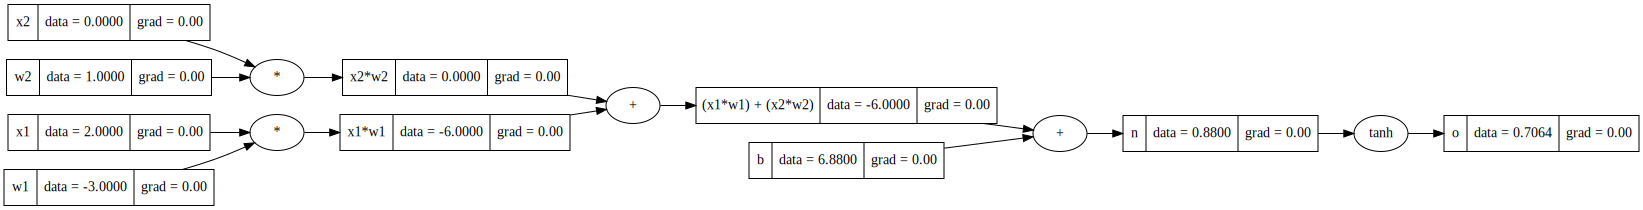

In [ ]:
x1 = Value(2.0,  label='x1')
w1 = Value(-3.0, label='w1')


x2 = Value(0.0, label='x2')
w2 = Value(1.0, label='w2')


b  = Value(6.88, label='b') # When b = 6.88, 1-o^2 = 0.50


x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'


x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = '(x1*w1) + (x2*w2)'


n = x1w1x2w2 + b; n.label = 'n'
# print(n)


o = n.tanh(); o.label = 'o'
# print(o)


# show grads:
draw_dot(o)

In [ ]:
o.grad = 1

In [ ]:
topo = []
visited = set()

def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        #end-for
        topo.append(v)
    #end-if/else
#end-def
build_topo(o)

topo

[Value(data=6.88, grad=0.0, label=b),
 Value(data=0.0, grad=0.0, label=x2),
 Value(data=1.0, grad=0.0, label=w2),
 Value(data=0.0, grad=0.0, label=x2*w2),
 Value(data=2.0, grad=0.0, label=x1),
 Value(data=-3.0, grad=0.0, label=w1),
 Value(data=-6.0, grad=0.0, label=x1*w1),
 Value(data=-6.0, grad=0.0, label=(x1*w1) + (x2*w2)),
 Value(data=0.8799999999999999, grad=0.0, label=n),
 Value(data=0.7064193203972352, grad=1, label=o)]

In [ ]:
for node in reversed(topo):
    # print(node._backward())
    node._backward()
    print(node)
#end-for

Value(data=0.7064193203972352, grad=1, label=o)
Value(data=0.8799999999999999, grad=0.5009717437695084, label=n)
Value(data=-6.0, grad=0.5009717437695084, label=(x1*w1) + (x2*w2))
Value(data=-6.0, grad=0.5009717437695084, label=x1*w1)
Value(data=-3.0, grad=1.0019434875390167, label=w1)
Value(data=2.0, grad=-1.502915231308525, label=x1)
Value(data=0.0, grad=0.5009717437695084, label=x2*w2)
Value(data=1.0, grad=0.0, label=w2)
Value(data=0.0, grad=0.5009717437695084, label=x2)
Value(data=6.88, grad=0.5009717437695084, label=b)


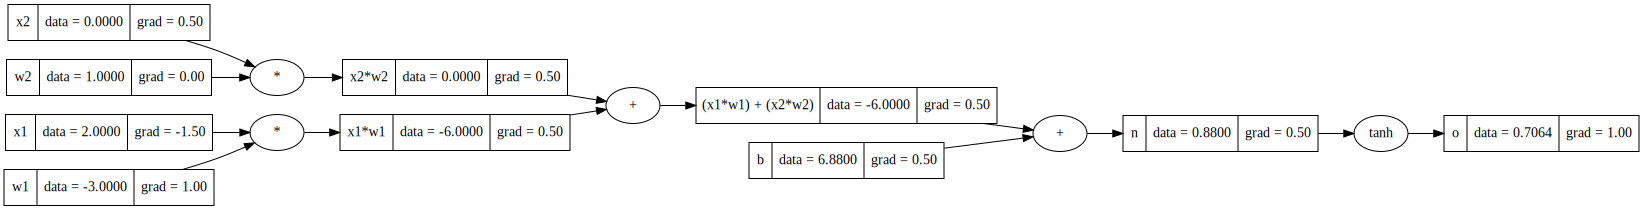

In [ ]:
draw_dot(o)

# Example-7: 1-Neuron Cell Calculation — Automated Gradients & Shortcut (Topological Sort — Inside of Class: Value)

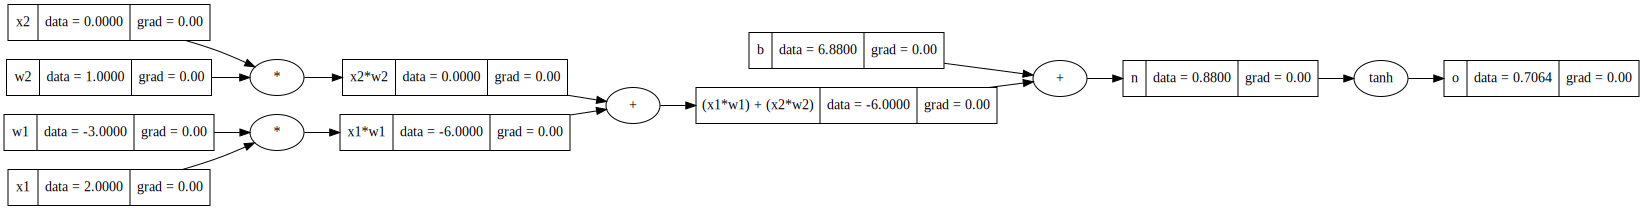

In [ ]:
x1 = Value(2.0,  label='x1')
w1 = Value(-3.0, label='w1')


x2 = Value(0.0, label='x2')
w2 = Value(1.0, label='w2')


b  = Value(6.88, label='b') # When b = 6.88, 1-o^2 = 0.50


x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'


x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = '(x1*w1) + (x2*w2)'


n = x1w1x2w2 + b; n.label = 'n'
# print(n)


o = n.tanh(); o.label = 'o'
# print(o)


# show grads:
draw_dot(o)

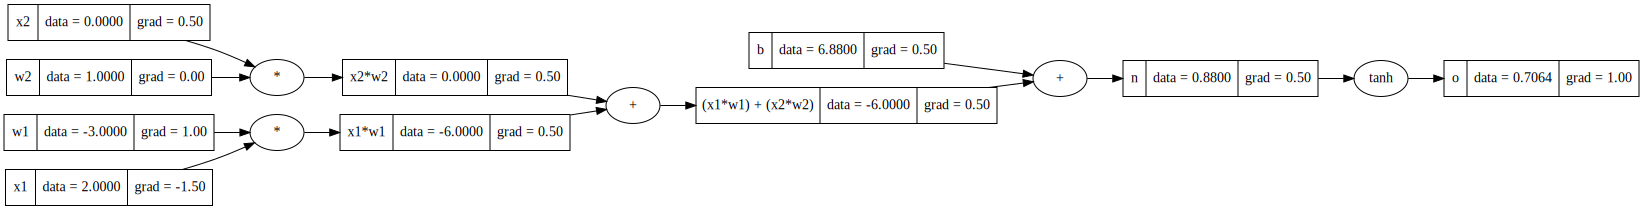

In [ ]:
o.backward()

draw_dot(o)

#Example-8: Fault Gradient:

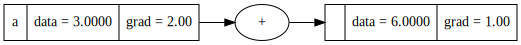

In [ ]:
a = Value(3, label='a')
o = a + a
draw_dot(o)

o.backward()
draw_dot(o)

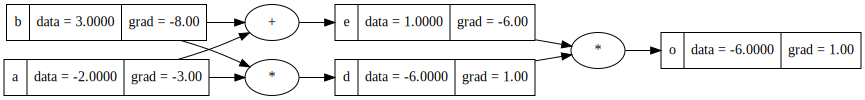

In [ ]:
a = Value(-2, label='a')

b = Value(3, label='b')

d = a * b; d.label = 'd'

e = a + b; e.label = 'e'

o = d * e; o.label = 'o'

draw_dot(o)

o.backward()
draw_dot(o)

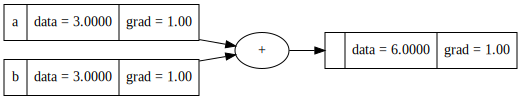

In [ ]:
a = Value(3, label='a')
b = Value(3, label='b')
o = a + b
# print(o)
draw_dot(o)

o.backward()
draw_dot(o)

In [ ]:
a = Value(0.88)
o = a.tanh()
draw_dot(o)


o.backward()
draw_dot(o)

In [ ]:
a = Value(0.88)
o = a.tanh()
draw_dot(o)


o.backward()
draw_dot(o)

In [ ]:
a = Value(3.0)

b = a ** 2.0
c = b ** 3.0
o = c.relu()

draw_dot(o)

o.backward()
draw_dot(o)

In [ ]:
a = Value(2.5, label='a')

o = a.relu(); b.label = 'b'

o = o.relu(); o.label = 'o'

draw_dot(o)

o.backward()
draw_dot(o)

# 9. Add a numeric value without class:Value

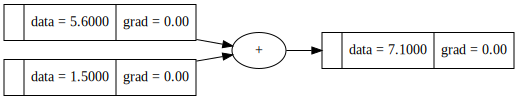

In [ ]:
a = Value(5.6)
o = a+1.5
draw_dot(o)

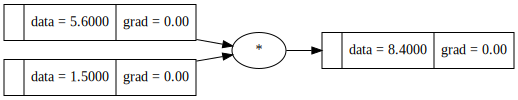

In [ ]:
a = Value(5.6)
o = 1.5 * a
draw_dot(o)

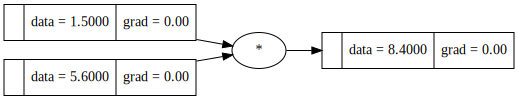

In [ ]:
a = Value(5.6)
o = a*1.5
draw_dot(o)

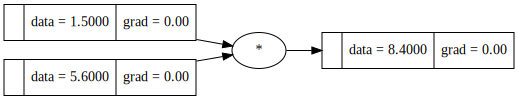

In [ ]:
a = Value(5.6)
o = 1.5 * a
draw_dot(o)

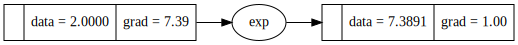

In [ ]:
a = Value(2)
o = a.exp()
draw_dot(o)

o.backward()
draw_dot(o)

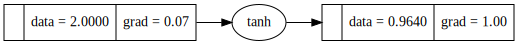

In [ ]:
a = Value(2)
o = a.tanh()
draw_dot(o)

o.backward()
draw_dot(o)

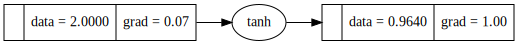

In [ ]:
a = Value(2)
o = a.tanh()
draw_dot(o)

o.backward()
draw_dot(o)

# 10: __neg__, __sub__, __truediv__:

Value(data=0.6666666666666666, grad=0.0, label=)


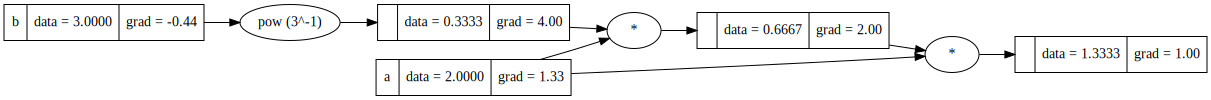

In [ ]:
a = Value(2, label='a')
b = Value(3, label='b')
print(a/3) # Doesnot work: print(3/a)

c = a/b; label='c'

o = a*c; label='o'
draw_dot(o)


o.backward()
draw_dot(o)

In [ ]:
a = Value(2, label='a')
b = Value(3, label='b')
print(a/b)
print(a/2)
print(2/b)

Value(data=0.6666666666666666, grad=0.0, label=)
Value(data=1.0, grad=0.0, label=)
Value(data=0.6666666666666666, grad=0.0, label=)


In [ ]:
a = Value(2, label='a')
b = Value(3, label='b')

print(a-b)

print(b-a)

print(a-2)

print(3-a)

print(3-a-2)

Value(data=-1.0, grad=0.0, label=)
Value(data=1.0, grad=0.0, label=)
Value(data=0, grad=0.0, label=)
Value(data=1.0, grad=0.0, label=)
Value(data=-1.0, grad=0.0, label=)


#11: Check Computational Graph once again using __truediv__, __sub__, __neg__, and __pow__:

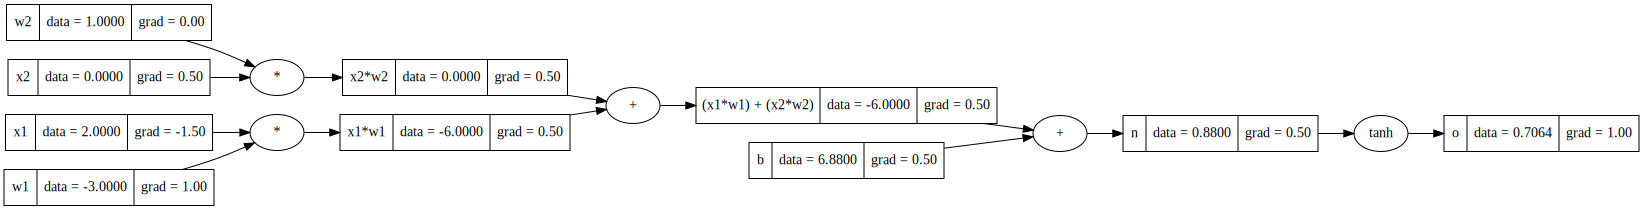

In [ ]:
x1 = Value(2.0,  label='x1')
w1 = Value(-3.0, label='w1')


x2 = Value(0.0, label='x2')
w2 = Value(1.0, label='w2')


b  = Value(6.88, label='b') # When b = 6.88, 1-o^2 = 0.50


x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'


x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = '(x1*w1) + (x2*w2)'


n = x1w1x2w2 + b; n.label = 'n'
# print(n)

o = n.tanh(); o.label = 'o'
o.label = 'o'

# print(o)
draw_dot(o)

# show graph with gradients:
o.backward()
draw_dot(o)

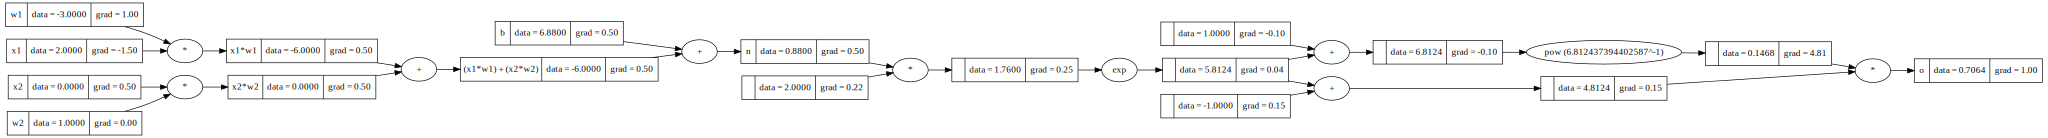

In [ ]:
x1 = Value(2.0,  label='x1')
w1 = Value(-3.0, label='w1')


x2 = Value(0.0, label='x2')
w2 = Value(1.0, label='w2')


b  = Value(6.88, label='b') # When b = 6.88, 1-o^2 = 0.50


x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'


x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = '(x1*w1) + (x2*w2)'


n = x1w1x2w2 + b; n.label = 'n'
# print(n)

# o = n.tanh(); o.label = 'o'

e = (n*2).exp()
o = (e-1)/(e+1)

# o = n.tanh(); o.label = 'o'

o.label = 'o'


# print(o)
# draw_dot(o)


# show graph with gradients:
o.backward()
draw_dot(o)

#12. __pow__ fallacy:

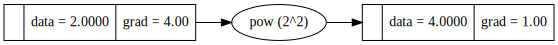

In [ ]:
a = Value(2)
o = a ** 2 # o = a.__pow__(2)
# o = o ** 3

o.backward()
draw_dot(o)

#13. Check Gradient using PyTorch:

In [ ]:
# import torch
'''
x1 = Value(2.0,  label='x1')
w1 = Value(-3.0, label='w1')
x2 = Value(0.0, label='x2')
w2 = Value(1.0, label='w2')
b  = Value(6.88, label='b') # When b = 6.88, 1-o^2 = 0.50
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = '(x1*w1) + (x2*w2)'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()
'''

x1 = torch.tensor([2.0], dtype=float, requires_grad=True)
w1 = torch.tensor([-3.0], dtype=float, requires_grad=True)

x2 = torch.tensor([0.0], dtype=float, requires_grad=True)
w2 = torch.tensor([1.0], dtype=float, requires_grad=True)

b = torch.tensor([6.88], dtype=float, requires_grad=True)

x1w1 = x1*w1
x2w2 = x2*w2

x1w1x2w2 = x1w1 + x2w2

n = x1w1x2w2 + b

o = torch.tanh(n)

# print(o) # tensor([0.7064], dtype=torch.float64, grad_fn=<TanhBackward0>)
# print(o.data) # tensor([0.7064], dtype=torch.float64)

print(o.data.item()) # = print(o.item()) = 0.7064193203972352

# Note: "variable.grad" will not work before calling "o.backward()"
o.backward()

print(f'gradient of x1 (∂o/∂x1) x1: {x1.grad.item():0.4f}')
print(f'gradient of w1 (∂o/∂w1) w1: {w1.grad.item():0.4f}')
print(f'gradient of x2 (∂o/∂x2) x2: {x2.grad.item():0.4f}')
print(f'gradient of w2 (∂o/∂w2) w2: {w2.grad.item():0.4f}')

0.7064193203972352
gradient of x1 (∂o/∂x1) x1: -1.5029
gradient of w1 (∂o/∂w1) w1: 1.0019
gradient of x2 (∂o/∂x2) x2: 0.5010
gradient of w2 (∂o/∂w2) w2: 0.0000


In [ ]:
# a = torch.tensor([2.0], dtype=float, requires_grad=True)
a = torch.tensor([2.0]).double(); a.requires_grad = True

o = a ** 3.0 # 2^3=8

o.backward() # However, without "requires_grad=True", "o.backward()"" will not work.

print(o.item())
# print(o.grad)

print(f'gradient of a (∂o/∂a): {a.grad.item():0.4f}') # ∂o/∂a = 3*2^(2-1) = 12

print(a.dtype)

8.0
gradient of a (∂o/∂a): 12.0000
torch.float64


#14. Multi-layer Perceptron (MLP):

#ignore

In [ ]:
a = Value(2, label='a')
b = Value(3, label='b')
# c = (a - b); label='c'

c = 5-a; label='c'

o = c.tanh(); label='o'
draw_dot(o)


o.backward()
draw_dot(o)

TypeError: bad operand type for unary -: 'Value'

# (ignore) Some Testing:

In [ ]:
v = Value(4.5)
print(v)
print(v.data)
print(v._backward)

Value(data=4.5)
4.5
<function Value.__init__.<locals>.<lambda> at 0x7adf6c976200>


In [ ]:
np.tanh(0.70)

0.6043677771171634

In [ ]:
def gd(x, alpha, max_iter=10):
    xs = []
    xs += [x]
    for i in range(max_iter):
        x = x - alpha * d_central(x, 0.01)
        xs += [x]
    return torch.tensor(xs)
#end-def

tensor([1.0000, 0.8000, 0.7200, 0.6880, 0.6752, 0.6701, 0.6680, 0.6672, 0.6669,
        0.6668, 0.6667])


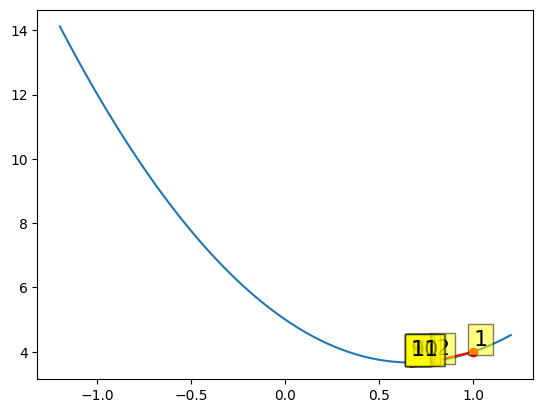

In [ ]:
alpha = 0.1
x0 = 1
xs = gd(x0, alpha)

print(xs)

xp = torch.linspace(-1.2, 1.2, 100)
plt.plot(xp, F(xp))
plt.plot(xs, F(xs), 'o-', c='red')

for i, (x, y) in enumerate(zip(xs, F(xs)), 1):
    plt.text(x, y+0.2, i, bbox=dict(facecolor='yellow', alpha=0.5), fontsize=16)
#end-for